In [32]:
from dvh_from_structures import analyse_structures
import torch
import os
import numpy as np
from pydicom import dcmread
import sys
sys.path.append('/Users/simongutwein/Documents/GitHub/Master_Thesis/workflow_code')
from pt_ct import convert_ct_array
import matplotlib.pyplot as plt


1024 1024


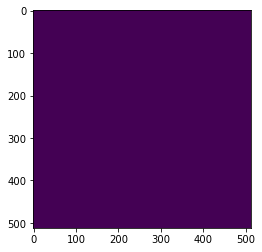

In [63]:
dat = dcmread("/Users/simongutwein/Studium/Masterarbeit/waterphantom/waterphantom_image0.dcm", force=True)
plt.imshow(dat.pixel_array)
print(dat.pixel_array.min(), dat.pixel_array.max())


In [55]:
input = torch.load("/Users/simongutwein/Desktop/waterphantom_10x10/training_data.pt")
target = torch.load("/Users/simongutwein/Desktop/waterphantom_10x10/target_data.pt")
input2 = torch.load("/mnt/qb/baumgartner/sgutwein84/training/training_hlmp/h0_0/training_data.pt")


tensor(102.9127) tensor(0.)


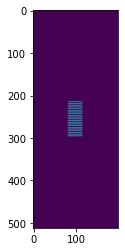

tensor(9.1822) tensor(0.)


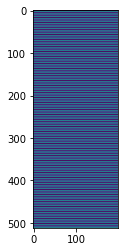

tensor(5498.5742) tensor(0.)


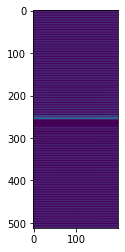

tensor(29.8828) tensor(0.)


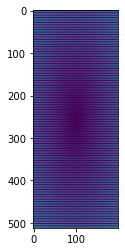

tensor(175.8775) tensor(0.)


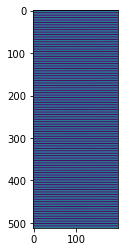

In [58]:
for i in input:
    plt.imshow(i[256,:,:])
    print(i[:, :, 100].max(), i[:, :, 100].min())
    plt.show()


In [81]:


target_high = torch.load("/Users/simongutwein/Desktop/results_phantom/phantomdeep_10x10_results/10x10/mixed_trained_UNET_1183.pt/target.pt")
pred_mix_high = torch.load("/Users/simongutwein/Desktop/results_phantom/phantomdeep_10x10_results/10x10/mixed_trained_UNET_1183.pt/prediction.pt")
pred_prost_high = torch.load("/Users/simongutwein/Desktop/results_phantom/phantomdeep_10x10_results/10x10/prostate_trained_UNET_2234.pt/prediction.pt")
target_deep = torch.load("/Users/simongutwein/Desktop/results_phantom/phantomdeep_10x10_results/10x10/mixed_trained_UNET_1183.pt/target.pt")
pred_mix_deep = torch.load("/Users/simongutwein/Desktop/results_phantom/phantomdeep_10x10_results/10x10/mixed_trained_UNET_1183.pt/prediction.pt")
pred_prost_deep = torch.load("/Users/simongutwein/Desktop/results_phantom/phantomdeep_10x10_results/10x10/prostate_trained_UNET_2234.pt/prediction.pt")

max_idx_high = np.argwhere(target_high == target_high.max())
max_idx_deep = np.argwhere(target_deep == target_deep.max())


In [85]:
# center_line_y_high = 256
# center_slice_high = max_idx_high[2]

# target_center_high = target_high[:, center_line_y_high, center_slice_high]
# mix_center_high = pred_mix_high[:, center_line_y_high, center_slice_high]
# prost_center_high = pred_prost_high[:, center_line_y_high, center_slice_high]

# center_line_y_deep = 256
# center_slice_deep = max_idx_deep[2]

# target_center_deep = target_deep[:, center_line_y_deep, center_slice_high]
# mix_center_deep = pred_mix_deep[:, center_line_y_deep, center_slice_high]
# prost_center_deep = pred_prost_deep[:, center_line_y_deep, center_slice_high]

center_line_y_high = 256
center_slice_high = max_idx_high[2]

target_center_high = target_high[300,:, 100]
mix_center_high = pred_mix_high[300,:, 100]
prost_center_high = pred_prost_high[300,:, 100]

center_line_y_deep = 256
center_slice_deep = max_idx_deep[2]

target_center_deep = target_deep[300,256, :]
mix_center_deep = pred_mix_deep[300,256, :]
prost_center_deep = pred_prost_deep[300,256, :]


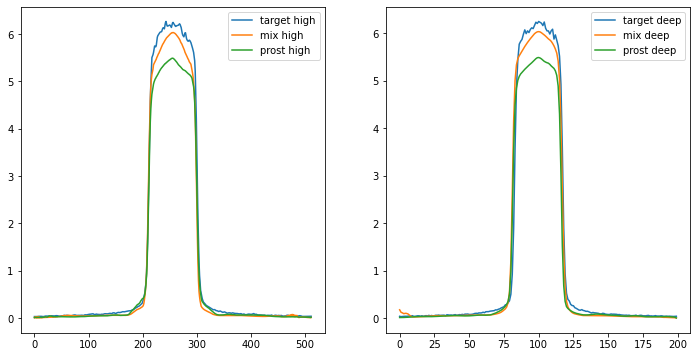

(2, 3)


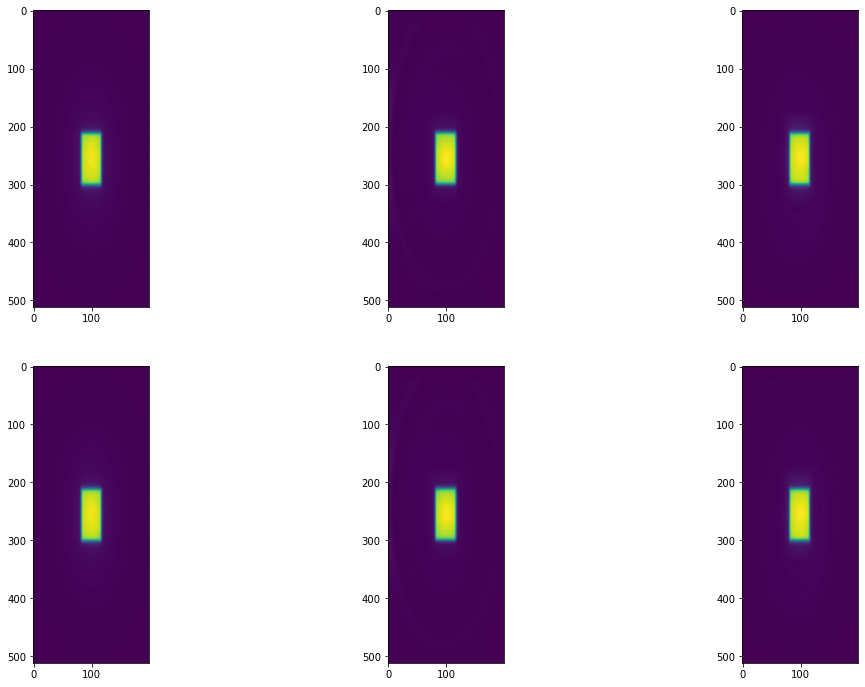

In [86]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].plot(range(len(target_center_high)), target_center_high)
ax[0].plot(range(len(target_center_high)), mix_center_high)
ax[0].plot(range(len(target_center_high)), prost_center_high)
ax[0].legend(["target high", "mix high","prost high"])

ax[1].plot(range(len(target_center_deep)), target_center_deep)
ax[1].plot(range(len(target_center_deep)), mix_center_deep)
ax[1].plot(range(len(target_center_deep)), prost_center_deep)
ax[1].legend(["target deep", "mix deep", "prost deep"])
plt.show()

fig, ax=plt.subplots(2, 3, figsize=(18, 12))
print(ax.shape)

ax[0][0].imshow(target_high[300, :, :])
ax[0][1].imshow(pred_mix_high[300, :, :])
ax[0][2].imshow(pred_prost_high[300, :, :])

ax[1][0].imshow(target_deep[300, :, :])
ax[1][1].imshow(pred_mix_deep[300, :, :])
ax[1][2].imshow(pred_prost_deep[300, :, :])
